<a href="https://colab.research.google.com/github/plaban1981/Machinehack/blob/master/forecast_the_weekly_average_tea_price_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

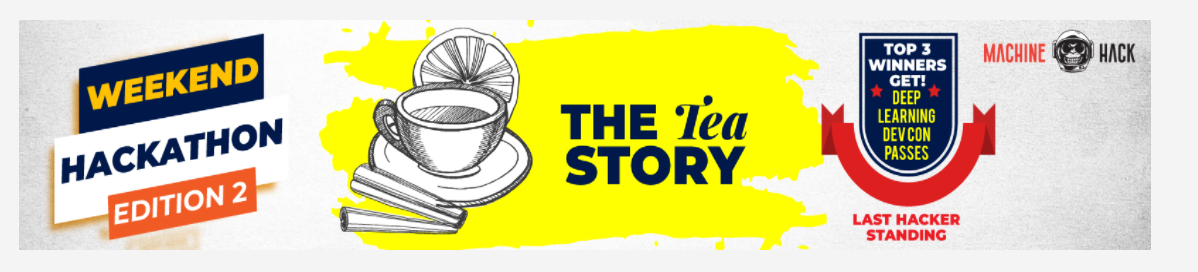

## Problem Statement 

To analyse the temporal nature of tea prices in the training dataset and forecast the weekly average tea price for the 29 weeks mentioned in the test set.

## About Dataset:

* Train.csv — 544 rows x 15 columns (includes ‘Average’ as a target variable)

* Test.csv — 29 rows x 15 columns

#### Column details: 

* ‘WeekEnding_Date’;
* “Average Prices across Auction Places Kolkata, Bangalore, Cochin, Darjeeling, Ernakulam, Siliguri and Guwahati”; and 
* Ref_Price across Auction Places Kolkata, Bangalore, Cochin, Darjeeling, Ernakulam, Siliguri and Guwahati.”

#### Target Variable:  Average

## Evaluation

The submission will be evaluated using the RMSE metric. One can use One can use ‘np. sqrt (Mean Squared Error)’ to calculate the same.

In [ ]:
from google.colab import files
files.upload()

Saving Participant_Data_Tea_Story.zip to Participant_Data_Tea_Story.zip


{'Participant_Data_Tea_Story.zip': b'PK\x03\x04\x14\x00\x08\x00\x08\x00O=\rS\x00\x00\x00\x00\x00\x00\x00\x00O\xe6\x00\x00\t\x00 \x00train.csvUT\r\x00\x07\x0e\xd5\x15a\x0f\xd5\x15a\x0e\xd5\x15aux\x0b\x00\x01\x04\xf5\x01\x00\x00\x04\x14\x00\x00\x00\xad\x9d[\xae\xadI\xb1\x9d\xdf\x91\xe8\x03\rX\x9a\xe4=3\x1em\x9f#?XB\x96\xeb\xc1\x8f\xa8t\\\xe6`0H\x18\xec\xee\xb8-n\x993\xc6\x18\x11\xff\xbf7\xe5\x9bd@\xc5f\xb1\xf6\x8c\x99\xf7\x88/n\xff\xfe\xa7\x9f\xfe\xf0\x8f\x7f\xfa\x0f\xbf\xff\xd3\xef~\xfb\x0f?\xfe\xf5\xa7\xaf\x7f\xf3\xe7?\xfe\xe1\xc7\xbf\xfe\xf8\xdb\x7f\xf1_\x7f\xfa\xcb\x8f\xbf\xfb\xe9\xb7\xff\xf6/\xbf\xff\xa7\xe7\xa7\xff\xee\xa7\xff\xa8\x9f\xfc\xcb\x1f\xff\xf4\xbb\x1f\xff\xf8\xe7\xbf\xfc\xf4\xddo>?\x7f~\xf7_\xfd\xf9\x9f\xfe\xf9\xf7\x7f\xfa\xee\x17\xf5\xc3\xe7\xb7\xfe\xe1\xc7\xbf\xfc\xa7\x9f~\xfa\xa3\x7f\x93o\x7f\xf3\xf5\x7f<\xbf\xfd\x8f\x7f\xf9\xd3\x8f\x7f\xf8\xdb\x1f\x7f\xfc\xcf\xdf\xfd\xf2\xf3\xf3\xe7w\x7f\xf8\xfd\x1f\x7f\xff\xbb\xbf\xfd\xe5\xf7\xdf\xfdj\xfe\xf8\xf9\xcd\x7f\xfd\xb7\xff

## Unzip Data

In [ ]:
! unzip "/content/Participant_Data_Tea_Story.zip"

Archive:  /content/Participant_Data_Tea_Story.zip
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    
  inflating: test.csv                
  inflating: __MACOSX/._test.csv     
  inflating: submission.csv          
  inflating: __MACOSX/._submission.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sub = pd.read_csv("/content/submission.csv")

In [ ]:
train.head()

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,03/01/09,99.01,79.79,N.S.,76.19,84.02,70.07,81.66,57.83,68.94,51.67,70.74,53.88,65.55,46.75,69.700000
1,10/01/09,97.74,78.73,87.48,73.97,82.72,68.17,83.31,58.02,67.24,52.23,70.47,53.39,67.39,46.84,70.550000
2,17/01/09,95.95,71.01,87.66,71.01,80.58,67.16,82.25,57.49,69.64,52.48,71.66,53.18,69.51,48.04,69.830000
3,24/01/09,94.14,73.38,85.69,65.66,N.S.,65.57,80.87,54.59,N.S.,53.43,71.12,52.07,69.14,48.5,67.846667
4,31/01/09,91.45,70.39,N.S.,64.99,79.27,62.09,80.76,57.06,69.65,53.38,72.3,52.5,69.39,50.33,67.196923


In [ ]:
test.head()

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
0,15/06/19,NaN,165.87,154.08,160.82,NaN,NaN,116.45,112.82,91.82,NaN,102.30,NaN,83.07,65.34,NaN
1,22/06/19,171.35,173.12,NaN,NaN,NaN,NaN,NaN,NaN,90.68,76.34,NaN,NaN,81.34,NaN,NaN
2,29/06/19,NaN,NaN,156.14,NaN,NaN,150.39,NaN,NaN,NaN,NaN,96.84,NaN,NaN,NaN,NaN
3,06/07/19,NaN,NaN,158.04,NaN,NaN,146.68,111.24,111.47,NaN,NaN,97.87,NaN,NaN,NaN,NaN
4,13/07/19,NaN,NaN,157.55,163.85,NaN,144.87,NaN,111.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sub.head()

,Average
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
train.shape,test.shape

((544, 16), (29, 16))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WeekEnding_Date           544 non-null    object 
 1   Kolkata_Average_Price     544 non-null    object 
 2   Kolkata_Ref_Price         542 non-null    object 
 3   Bangalore_Average_Price   544 non-null    object 
 4   Bangalore_Ref_Price       542 non-null    object 
 5   Cochin_Average_Price      544 non-null    object 
 6   Cochin_Ref_Price          541 non-null    object 
 7   Darjeeling_Average_Price  544 non-null    object 
 8   Darjeeling_Ref_Price      542 non-null    object 
 9   Ernakulam_Average_Price   544 non-null    object 
 10  Ernakulam_Ref_Price       543 non-null    object 
 11  Siliguri_Average_Price    543 non-null    object 
 12  Siliguri_Ref_Price        543 non-null    object 
 13  Guwahati_Average_Price    544 non-null    object 
 14  Guwahati_R

In [ ]:
train['WeekEnding_Date'] = pd.to_datetime(train['WeekEnding_Date'])
test['WeekEnding_Date'] = pd.to_datetime(test['WeekEnding_Date'])

## Sorting the data in ascending order of the week ending date

In [ ]:
train = train.sort_values(by='WeekEnding_Date')
test = test.sort_values(by='WeekEnding_Date')

In [ ]:
train.head(10)

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
30,2009-01-08,120.93,97.27,112.08,92.36,105.19,87.63,N.S.,72.88,69.64,67.21,76.8,68.9,71.04,65.9,85.217692
2,2009-01-17,95.95,71.01,87.66,71.01,80.58,67.16,82.25,57.49,69.64,52.48,71.66,53.18,69.51,48.04,69.830000
3,2009-01-24,94.14,73.38,85.69,65.66,N.S.,65.57,80.87,54.59,N.S.,53.43,71.12,52.07,69.14,48.5,67.846667
4,2009-01-31,91.45,70.39,N.S.,64.99,79.27,62.09,80.76,57.06,69.65,53.38,72.3,52.5,69.39,50.33,67.196923
17,2009-02-05,126.49,95.14,122.25,87.51,118.95,86.36,87.37,59.05,85.14,56.17,83.31,55.35,79.73,53.5,85.451429
6,2009-02-14,87.95,67.81,79.98,62.5,78.25,61.27,83.92,57.66,69.93,51.8,70.9,53.47,65.14,49.76,67.167143
7,2009-02-21,84.39,65.69,75.27,59.39,78.25,61.27,75.1,58.15,82.9,58.53,69.85,52.69,66.39,50,66.990714
8,2009-02-28,79.92,N.S.,74.41,55.65,71.29,57.02,82.62,58.14,69.47,53.99,71.27,53.8,68.95,51,65.194615
0,2009-03-01,99.01,79.79,N.S.,76.19,84.02,70.07,81.66,57.83,68.94,51.67,70.74,53.88,65.55,46.75,69.700000
39,2009-03-10,N.S,111.43,N.S,105.19,N.S,97.97,86.5,90.63,75.59,80.32,77.85,82.36,78.6,76.96,87.581818


In [ ]:
train.tail(100)

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
457,2017-07-10,165.01,144.54,151.24,139.15,127.2,127.22,106.27,110.64,79.82,97.46,90.73,100.82,61.87,88.07,113.574286
445,2017-07-15,160.57,171.5,151.21,154.04,132.76,142.89,106.61,113.15,69.83,91,86.87,94.33,63.19,82.86,115.772143
446,2017-07-22,165.87,162.54,151.19,149.85,129.39,138.38,104.76,114.23,71.86,87.62,82.61,92.73,62.5,81.56,113.935000
447,2017-07-29,162.98,159.43,153.23,146.07,126.41,135.79,106.11,115.98,74.01,85.42,80.45,91.17,62.86,79.49,112.814286
431,2017-08-04,112.7,143.69,130.71,170.53,144.27,160,137.24,115.66,105.81,93.73,110.9,100.55,98.26,83.17,121.944286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,2019-08-06,151.61,156.67,146.91,153.37,147.83,145.44,120.12,112.83,92.16,76.98,105.16,91.57,84.63,67.13,118.029286
526,2019-09-02,124.27,119.08,120.36,104.53,115.83,103.48,124.53,123.73,97.97,94.85,103.63,101.46,88.44,73.91,106.862143
530,2019-09-03,115.79,NS,NS,99.3,107.78,92.72,121.82,121.39,100.44,93.96,106.52,103.78,92.33,71.05,102.240000
539,2019-11-05,152.57,165.65,134.76,146.06,149.81,134.17,122.98,115.81,98.29,81.65,109.36,94.33,89.81,70.66,118.993571


In [ ]:
new_data = train[['WeekEnding_Date','Average']]
new_data.set_index('WeekEnding_Date',inplace=True)

In [ ]:
new_data.tail()

,Average
WeekEnding_Date,
2019-08-06,118.029286
2019-09-02,106.862143
2019-09-03,102.240000
2019-11-05,118.993571
2019-12-01,112.714286


## Visualize the Average across years

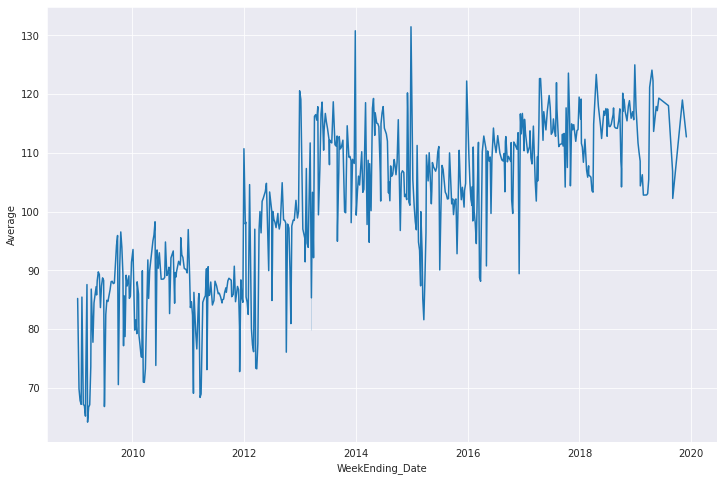

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x='WeekEnding_Date',y='Average',data=train)
plt.show()

In [ ]:
test.head(30)

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
20,2019-02-11,NaN,NaN,NaN,NaN,NaN,NaN,113.03,NaN,NaN,96.51,NaN,NaN,NaN,NaN,NaN
7,2019-03-08,182.14,NaN,NaN,NaN,NaN,142.63,NaN,NaN,NaN,83.83,NaN,NaN,NaN,NaN,NaN
16,2019-05-10,NaN,160.79,NaN,NaN,130.74,NaN,NaN,NaN,NaN,93.90,NaN,NaN,73.13,NaN,NaN
3,2019-06-07,NaN,NaN,158.040,NaN,NaN,146.68,111.24,111.47,NaN,NaN,97.87,NaN,NaN,NaN,NaN
0,2019-06-15,NaN,165.87,154.080,160.82,NaN,NaN,116.45,112.82,91.82,NaN,102.30,NaN,83.07,65.34,NaN
1,2019-06-22,171.35,173.12,NaN,NaN,NaN,NaN,NaN,NaN,90.68,76.34,NaN,NaN,81.34,NaN,NaN
2,2019-06-29,NaN,NaN,156.140,NaN,NaN,150.39,NaN,NaN,NaN,NaN,96.84,NaN,NaN,NaN,NaN
12,2019-07-09,NaN,161.30,NaN,NaN,NaN,140.40,108.07,134.41,NaN,NaN,NaN,NaN,NaN,82.68,NaN
25,2019-07-12,NaN,159.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.62,NaN,NaN,92.22,NaN
4,2019-07-13,NaN,NaN,157.550,163.85,NaN,144.87,NaN,111.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
p_df = train[['WeekEnding_Date','Average']]
p_df = p_df.rename(columns={'WeekEnding_Date':'ds','Average':'y'})
p_df.head()

,ds,y
30,2009-01-08,85.217692
2,2009-01-17,69.830000
3,2009-01-24,67.846667
4,2009-01-31,67.196923
17,2009-02-05,85.451429


In [32]:
from fbprophet import Prophet 
model = Prophet(
        yearly_seasonality=False,
        weekly_seasonality=True,
        daily_seasonality=True,
        interval_width=0.95, 
        mcmc_samples = 100
    )

In [34]:
model.fit(p_df)

In [35]:
# Extend dates and features. 
future = model.make_future_dataframe(periods=test.shape[0], freq='W')
# Generate predictions. 
forecast = model.predict(df=future)

In [ ]:
for c in forecast.columns.sort_values():
    print(c)

additive_terms
additive_terms_lower
additive_terms_upper
ds
multiplicative_terms
multiplicative_terms_lower
multiplicative_terms_upper
trend
trend_lower
trend_upper
weekly
weekly_lower
weekly_upper
yhat
yhat_lower
yhat_upper


## Let us split the predictions into training and test set.

In [36]:
threshold_date = '2017-07-29'
mask = p_df['ds'] < threshold_date
# Split the data and select `ds` and `y` columns.
df_train = p_df[mask][['ds', 'y']]
df_test = p_df[~ mask][['ds', 'y']]

In [37]:
mask2 = forecast['ds'] < threshold_date

forecast_train = forecast[mask2]
forecast_test = forecast[~ mask2]

In [38]:
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

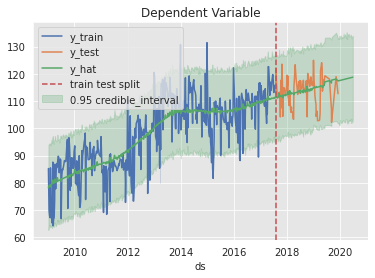

In [39]:
fig, ax = plt.subplots()

ax.fill_between(
    x=forecast['ds'],
    y1=forecast['yhat_lower'],
    y2=forecast['yhat_upper'],
    color=sns_c[2], 
    alpha=0.25,
    label=r'0.95 credible_interval'
)

sns.lineplot(x='ds', y='y', label='y_train', data=df_train, ax=ax)
sns.lineplot(x='ds', y='y', label='y_test', data=df_test, ax=ax)
sns.lineplot(x='ds', y='yhat', label='y_hat', data=forecast, ax=ax)
ax.axvline(pd.to_datetime(threshold_date), color=sns_c[3], linestyle='--', label='train test split')
ax.legend(loc='upper left')
ax.set(title='Dependent Variable', ylabel='');

In [ ]:
prediction = forecast[['ds','weekly','yhat']]

In [28]:
prediction[prediction['ds'] == '2019-02-11']

,ds,weekly,yhat


In [29]:
test.shape[0]

29

In [31]:
test.tail()

,WeekEnding_Date,Kolkata_Average_Price,Kolkata_Ref_Price,Bangalore_Average_Price,Bangalore_Ref_Price,Cochin_Average_Price,Cochin_Ref_Price,Darjeeling_Average_Price,Darjeeling_Ref_Price,Ernakulam_Average_Price,Ernakulam_Ref_Price,Siliguri_Average_Price,Siliguri_Ref_Price,Guwahati_Average_Price,Guwahati_Ref_Price,Average
24,2019-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.19,77.62,102.90,NaN,NaN,NaN,94.29,NaN
17,2019-12-10,NaN,164.21,151.215,148.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.65,73.55,NaN,NaN
26,2019-12-14,153.19,NaN,NaN,140.67,NaN,NaN,115.97,NaN,NaN,97.73,NaN,111.75,66.11,NaN,NaN
27,2019-12-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.61,NaN,105.66,NaN,NaN,NaN
28,2019-12-28,152.94,NaN,134.250,NaN,135.65,NaN,116.47,NaN,NaN,NaN,NaN,NS,NaN,NaN,NaN


In [40]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-01-08,-388.885457,62.663694,93.835083,-873.439567,259.346780,467.008641,-180.984975,950.279275,467.868681,-180.568924,951.421705,-0.860040,-3.137853,2.264302,0.0,0.0,0.0,78.123184
1,2009-01-17,-388.761911,64.346426,94.375146,-873.331696,259.496437,467.747675,-181.288891,951.972262,467.868681,-180.568924,951.421705,-0.121006,-1.281880,1.117005,0.0,0.0,0.0,78.985763
2,2009-01-24,-388.665820,63.618905,94.447692,-873.247797,259.612838,467.747675,-181.288891,951.972262,467.868681,-180.568924,951.421705,-0.121006,-1.281880,1.117005,0.0,0.0,0.0,79.081855
3,2009-01-31,-388.569729,64.471844,94.432988,-873.163897,259.729238,467.747675,-181.288891,951.972262,467.868681,-180.568924,951.421705,-0.121006,-1.281880,1.117005,0.0,0.0,0.0,79.177946
4,2009-02-05,-388.501092,63.771865,93.776908,-873.103969,259.812381,467.008641,-180.984975,950.279275,467.868681,-180.568924,951.421705,-0.860040,-3.137853,2.264302,0.0,0.0,0.0,78.507549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,2020-05-24,-349.561432,103.534480,134.431994,-835.233563,296.676073,468.139485,-180.556420,951.732176,467.868681,-180.568924,951.421705,0.270804,-2.444149,2.558424,0.0,0.0,0.0,118.578054
568,2020-05-31,-349.514400,101.943150,133.475113,-835.202097,296.704429,468.139485,-180.556420,951.732176,467.868681,-180.568924,951.421705,0.270804,-2.444149,2.558424,0.0,0.0,0.0,118.625085
569,2020-06-07,-349.467369,103.294294,133.020963,-835.170630,296.732784,468.139485,-180.556420,951.732176,467.868681,-180.568924,951.421705,0.270804,-2.444149,2.558424,0.0,0.0,0.0,118.672117
570,2020-06-14,-349.420337,102.171043,133.787900,-835.139163,296.761139,468.139485,-180.556420,951.732176,467.868681,-180.568924,951.421705,0.270804,-2.444149,2.558424,0.0,0.0,0.0,118.719149


In [42]:
Avearge = forecast.tail(29)['yhat'].values.tolist()

In [44]:
test['Average'] = Avearge

In [45]:
test[['Average']].to_csv('predictions.csv',index=False)